In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
base_dir = '/content/gdrive/My Drive/Digikala Contest/Accepting Comments'

In [4]:
!unzip '/content/gdrive/My Drive/Digikala Contest/Accepting Comments/nlp_comments_users.zip' -d '/content/gdrive/My Drive/Digikala Contest/Accepting Comments'

Archive:  /content/gdrive/My Drive/Digikala Contest/Accepting Comments/nlp_comments_users.zip
replace /content/gdrive/My Drive/Digikala Contest/Accepting Comments/test_users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
train_df = pd.read_csv(base_dir + '/train_users.csv') 
test_df = pd.read_csv(base_dir + '/test_users.csv')

In [6]:
train_df.head(5)

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate
0,0,NaN,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,NaN,NaN,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300...,ضدعفونی کننده,1,1,100.0
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهم...,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و...","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو س...,گوشی موبایل,1,1,80.0
2,2,عالی,خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خو...,NaN,NaN,ماسک کودک طرح سگ نگهبان مدل رابل,ایفای نقش,1,1,100.0
3,3,NaN,در کل خوب بود ولی متاسفانه درب محصول شکسته بود...,NaN,NaN,مایع ضدعفونی کننده میوه و سبزیجات من مدل WT حج...,ضدعفونی کننده سطوح,1,1,70.0
4,4,NaN,من که خیلی باهاش حال کردم فقط من که همیشه L می...,NaN,NaN,تی شرت آستین کوتاه مردانه باینت کد 323-1 btt,تی شرت و پولوشرت مردانه,1,1,72.0


In [7]:
test_df.head(5)

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer
0,0,با کیفیت,بسته بندی بهداشتی و کیفیت عالی,NaN,NaN,گوش پاک کن کتابی پنبه ریز بسته 200 عددی,گوش پاک کن,1
1,1,گوشی موبایل شیائومی,این گوشی فوق‌العاده است,"[""این گوشی همه چیش فوق‌العاده است از دوربین تا...","[""اصلا هیچ نقاط ضعفی نداره ""]",گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG...,گوشی موبایل,1
2,2,NaN,صداش قطع میشه باتریشم خیییلی ضعیفه,NaN,NaN,هدفون بی سیم مدل inpods 12,هدفون، هدست و هندزفری,1
3,3,NaN,بنظرم‌ خوبه,NaN,NaN,خمیر دندان نسیم مدل Feluoride Protection مقدار...,خمیر دندان,1
4,4,عااالیه,عااالیه,"[""عاااالیه""]",NaN,کرم موبر صورت و بدن سینره حجم 100 میلی لیتر,کرم موبر,1


In [8]:
train_texts = train_df['comment'].tolist()
test_texts = test_df['comment'].tolist()

In [10]:
advantage_scores = []
i = 0

for index, row in train_df.iterrows():
  i = i+1
  if (pd.isnull(row['advantages'])):
    num_advantages = 0
  else:
    num_advantages = len(row['advantages'].split(','))
  if (pd.isnull(row['disadvantages'])):
    num_disadvantages = 0
  else:
    num_disadvantages = len(row['disadvantages'].split(','))

  advantage_scores.append(num_advantages - num_disadvantages) 

train_df['advantage_score'] = advantage_scores

print(i)
train_advantages = np.array(advantage_scores)

264399


In [11]:
advantage_scores = []
for index, row in test_df.iterrows():
  if (pd.isnull(row['advantages'])):
    num_advantages = 0
  else:
    num_advantages = len(row['advantages'].split(','))
  if (pd.isnull(row['disadvantages'])):
    num_disadvantages = 0
  else:
    num_disadvantages = len(row['disadvantages'].split(','))

  advantage_scores.append(num_advantages - num_disadvantages) 

test_df['advantage_score'] = advantage_scores

test_advantages = np.array(advantage_scores)

In [12]:
train_df

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate,advantage_score
0,0,NaN,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,NaN,NaN,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300...,ضدعفونی کننده,1,1,100.0,0
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهم...,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و...","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو س...,گوشی موبایل,1,1,80.0,6
2,2,عالی,خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خو...,NaN,NaN,ماسک کودک طرح سگ نگهبان مدل رابل,ایفای نقش,1,1,100.0,0
3,3,NaN,در کل خوب بود ولی متاسفانه درب محصول شکسته بود...,NaN,NaN,مایع ضدعفونی کننده میوه و سبزیجات من مدل WT حج...,ضدعفونی کننده سطوح,1,1,70.0,0
4,4,NaN,من که خیلی باهاش حال کردم فقط من که همیشه L می...,NaN,NaN,تی شرت آستین کوتاه مردانه باینت کد 323-1 btt,تی شرت و پولوشرت مردانه,1,1,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...
264394,264394,موز,خوبه و راضی کننده,NaN,NaN,موز هودکا - 1 کیلوگرم,میوه,1,1,90.0,0
264395,264395,کش,رنگ بندی زیبا و قیمت مناسبی دارد,NaN,NaN,کش مو مدل رنگارنگ بسته 12 عددی,اکسسوری مو زنانه,1,1,60.0,0
264396,264396,خوب بود,ولی بیشتر آف بذارید,NaN,NaN,نوار بهداشتی مولپد مدل Classic Large بسته 8 عددی,نوار بهداشتی,1,1,0.0,0
264397,264397,ارزش خرید داره,کلا بد نیست,NaN,NaN,شامپو بدن سیو مدل Sport مقدار 400 گرم,شامپوی بدن,1,1,60.0,0


In [13]:
test_df

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,advantage_score
0,0,با کیفیت,بسته بندی بهداشتی و کیفیت عالی,NaN,NaN,گوش پاک کن کتابی پنبه ریز بسته 200 عددی,گوش پاک کن,1,0
1,1,گوشی موبایل شیائومی,این گوشی فوق‌العاده است,"[""این گوشی همه چیش فوق‌العاده است از دوربین تا...","[""اصلا هیچ نقاط ضعفی نداره ""]",گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG...,گوشی موبایل,1,0
2,2,NaN,صداش قطع میشه باتریشم خیییلی ضعیفه,NaN,NaN,هدفون بی سیم مدل inpods 12,هدفون، هدست و هندزفری,1,0
3,3,NaN,بنظرم‌ خوبه,NaN,NaN,خمیر دندان نسیم مدل Feluoride Protection مقدار...,خمیر دندان,1,0
4,4,عااالیه,عااالیه,"[""عاااالیه""]",NaN,کرم موبر صورت و بدن سینره حجم 100 میلی لیتر,کرم موبر,1,1
...,...,...,...,...,...,...,...,...,...
19394,19394,NaN,خوشمزه مثل همیشه,NaN,NaN,چاشنی خورش قرمه سبزی هاتی کارا مقدار 750 گرم,ادویه و چاشنی,1,0
19395,19395,عالی,عالی\r\nبوش مثله خود ادکلنشه,NaN,NaN,اسپری خوشبو کننده بدن زنانه پرستیژ مدل Tresor ...,اسپری,1,0
19396,19396,NaN,نازکه. نسبت به کیفیتش قیمتش بالاست تازه من داخ...,NaN,NaN,دستکش زنانه دالیا مدل viscose2,دستکش زنانه,1,0
19397,19397,چای ایرانی,چای ایرانی بنوش هموطن,NaN,NaN,چای شکسته ایرانی مهمان دوست مقدار 500 گرم,چای,1,0


In [14]:
train_labels = train_df['verification_status'].tolist()

In [15]:
len(train_df)

264399

In [16]:
len(train_df[train_df['verification_status'] == 0])

9918

In [17]:
# cleaning the texts

import re

with open(base_dir + '/stopwords.txt', 'r') as stopwords:
    content = stopwords.read()
    stopwords_ls = content.split('\n')

for i in range(len(train_texts)):

  # the empty comments are float, we replace them with an empty string
  if type(train_texts[i]) == float:
    train_texts[i] = ''

  # removing meaningless literals
  train_texts[i] = train_texts[i].replace('\u200c',' ')
  train_texts[i] = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', train_texts[i])

  # removing stopwords

  for word in stopwords_ls:
    token = " " + word + " "
    train_texts[i] = train_texts[i].replace(token, " ")

In [18]:
for i in range(len(test_texts)):

  # the empty comments are float, we replace them with an empty string
  if type(test_texts[i]) == float:
    test_texts[i] = ''

  # removing meaningless literals
  test_texts[i] = test_texts[i].replace('\u200c',' ')
  test_texts[i] = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', test_texts[i])

  # removing stopwords
  for word in stopwords_ls:
    token = " " + word + " "
    test_texts[i] = test_texts[i].replace(token, " ")

In [19]:
# # stemming and normalizing with Hazm Library. Which sucks.

# !pip install hazm

# from __future__ import unicode_literals
# from hazm import *

# normalizer = Normalizer()
# train_texts = [normalizer.normalize(text) for text in train_texts]

# stemmer = Stemmer()

# train_texts_cleaned = []
# for sentence in train_texts:
#   sentence_cleaned = []
#   for word in sentence.split():
#     sentence_cleaned.append(stemmer.stem(word))
  
#   train_texts_cleaned.append(' '.join(sentence_cleaned))

# train_texts = train_texts_cleaned

In [20]:
train_texts[10:30]

['کیفیت قیمت است',
 'نسبت قیمتش خوبه',
 'همش وا کارتن پشیمون خریدم انگاری درشو باشن همش ریخته بود',
 'خوب بود',
 'با توجه قیمت صرفه دارای کیفیت قبول توجه شرایط موجود ایمنی حد مطلوب تامین کند',
 'سپاس سایت دیجیکالا',
 'عالی تنیز بسته بندی عالی',
 'عالی هست',
 'عالیییییییی',
 'خیلی خوبه حمام بخور ازش جواب میده',
 'خوبه کاربردی',
 'خیلی قشنگه سوراخای دیوار دستشویی ک مستاجر قبلی زده عیبای دیوار پوشیده قشنگ شد',
 'با توجه قیمتش کیفیت خوبی ',
 'با توج متنوع رنگ شکل زیبای مهره دکمه حروف حالت برجسته پیشنهاد میکنم بخرید',
 'مناسب نسبت قیمت',
 'تو شکسته مرجوع کردم',
 'بدمزه مزه دارو میده',
 'در راضی م',
 'دوستان عزیز قصد خرید پک 3تایی بهتره بدونید اسپری مردونه بسته بندی 4تا پک سفارش نبوده اشتباه باشه بجای رایحه مردانه 2تا زنانه گذاشتن دیجی کالا نظارت فروش محصولات حیف اعتبار دیجی کالا داره هرروز کمرنگ میشه  اینو بگم دوستان منتظر رایحه مردانه نباشن ',
 'از گره خوردن جلوگیری میکنه باعث میشه موها شونه بشه نرم خوش حالت میکنه موهارو']

In [21]:
from urllib.request import urlopen
import gzip

In [22]:
embedding_file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.vec.gz'))

In [23]:
fasttext_embeddings = {}
# put words as dict indexes and vectors as dict values

for line in embedding_file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  fasttext_embeddings[word] = vector

In [24]:
vocab_size = 20000
max_length = 60 # Estimated max length of comments
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [25]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_texts)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_texts)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [26]:
# Need this block to get it to work with TensorFlow 2.x

train_padded = np.array(train_padded)
train_labels = np.array(train_labels)

test_padded = np.array(test_padded)

In [27]:
num_tokens = len(word_index) + 1
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = fasttext_embeddings.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 45086 words (23524 misses)


In [44]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding, Bidirectional, concatenate, Dense, Dropout

In [29]:
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 2, mode='min')

In [56]:
nlp_input = Input(shape=(max_length,), name='nlp_input')
meta_input = Input(shape=(1,), name='meta_input')

emb = Embedding(num_tokens, embedding_dim, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), trainable=True)(nlp_input)
nlp_out = Bidirectional(LSTM(32))(emb)

conc = concatenate([nlp_out, meta_input])
dense_1 = Dense(24, activation='relu')(conc)
output = Dense(1, activation='sigmoid')(dense_1)

model = Model(inputs=[nlp_input , meta_input], outputs=[output])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [57]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 60, 300)      20583300    nlp_input[0][0]                  
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 64)           85248       embedding_4[0][0]                
__________________________________________________________________________________________________
meta_input (InputLayer)         [(None, 1)]          0                                            
_______________________________________________________________________________________

In [66]:
num_epochs = 1
history = model.fit([train_padded, train_advantages], train_labels, batch_size=256, epochs=num_epochs, callbacks=[early_stopping])

1033/1033 [==============================] - 205s 198ms/step - loss: 0.0587 - accuracy: 0.9796 - precision_3: 0.9854 - recall_3: 0.9936


KeyError: ignored

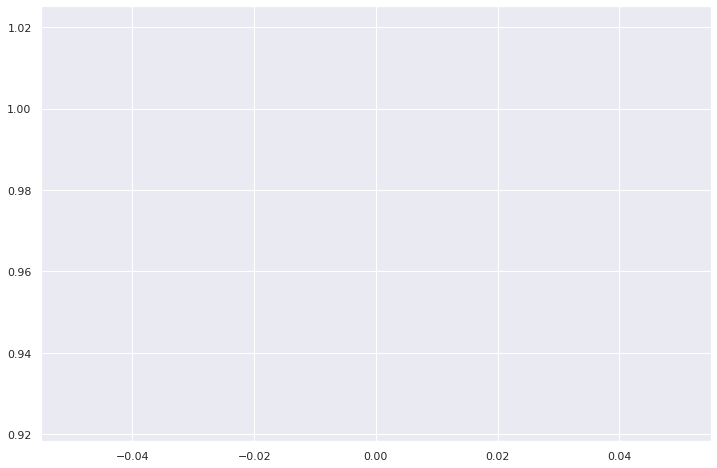

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

def plot_graphs(model_history, ploting_variable):
  plt.plot(model_history.history[ploting_variable])
  plt.plot(model_history.history['val_' + ploting_variable])
  plt.xlabel("Epochs")
  plt.ylabel(ploting_variable)
  plt.legend([ploting_variable, 'val_' + ploting_variable])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [61]:
test_predict = model.predict([test_padded, test_advantages])

In [62]:
count = 0
for prediction in test_predict:
  if prediction[0] < 0.1:
    count += 1
count

123

In [63]:
 predictions_df = test_df.copy()
 predictions_df.drop(labels=
                   ['title', 'comment', 'advantages', 'disadvantages', 'title_fa_product', 'title_fa_category', 'is_buyer', 'advantage_score'],
                   axis=1, inplace=True)
 predictions_df['verification_status'] = test_predict.round().astype(int)

In [64]:
predictions_df

,id,verification_status
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
19394,19394,1
19395,19395,1
19396,19396,1
19397,19397,1


In [65]:
predictions_df.to_csv(base_dir + '/predictions.csv', index= False)